# **Project Name: Decision Tree for Heart Disease Detection**


### **Project type:** Machine Learning Classification Project (Supervised Learning)
### **Domain:** Healthcare / Medical Diagnostics

## **Project Summary:**
* **Aim**: The objective of this project is to develop a machine learning model that can predict whether a patient is likely to have heart disease based on various health-related parameters using a Decision Tree Classifier.
* **Model Used**: Developed a Decision Tree Classifier to predict heart disease presence.
* **Dataset**: Used a dataset with 303 patient records and 14 clinical features.
* **Data Preparation**: Performed data cleaning, exploratory analysis, and visualization.
* **Initial Performance**: Achieved initial model accuracy of ~84% on test data.
* **Hyperparameter Tuning**: Applied GridSearchCV with cross-validation for tuning.
* **Improved Accuracy**: Boosted accuracy to ~90% after tuning.
* **Outcome**: Final model is accurate, interpretable, and valuable for early heart disease detection.

## **Problem Statement:**
Early detection of heart disease is vital but challenging due to multiple risk factors. This project aims to build an accurate and interpretable machine learning model to predict heart disease from patient data, helping doctors identify high-risk patients quickly and improve treatment outcomes.



## ***Let's Begin!!***

## **Step 1: Importing Libraries**

In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV

# Visualization of decision tree
from sklearn import tree

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## **Step 2: Loading Dataset**

In [143]:
#file upload in Colab
from google.colab import files
uploaded=files.upload()

Saving heart (3).csv to heart (3) (4).csv


In [144]:
# Load the dataset from local storage
df = pd.read_csv("heart (3).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Insights:
1. There are 303 records of patients.
2. 'target' column is Dependent variable.
3. Other features are Independent variables.

## **Step 3: Exploratory Data Analysis (EDA**)

In [145]:
# Displays number of rows and columns in the DataFrame
df.shape

(303, 14)

In [146]:
# Counts unique values in the 'target' column
df['target'].value_counts()

,count
target,
1,165
0,138


* 1: Patient has heart disease  
* 0: Patient does not have heart disease  

In [147]:
# Displays information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* All columns are either int64 or float64 (No categorical strings).

## **Step 4: Data Cleaning**

### Null Value Check

In [148]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No null values present.

### Duplicate Records

In [149]:
 df.duplicated().sum()

np.int64(1)

In [150]:
#Drop duplicates rows
df.drop_duplicates(inplace=True)

### Outlier Detection

**Boxplots used to visualize outliers for numerical columns**

In [151]:
# First create a list with all column name
col = list(df.columns)
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

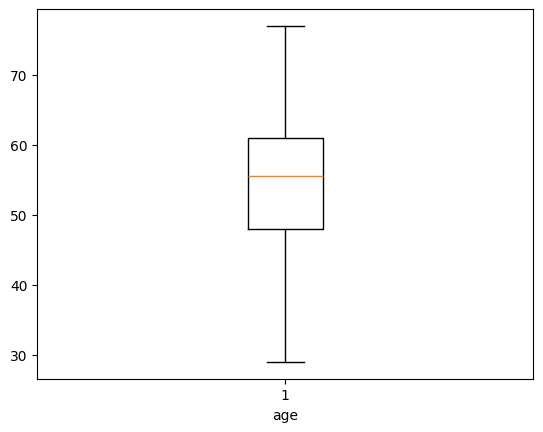

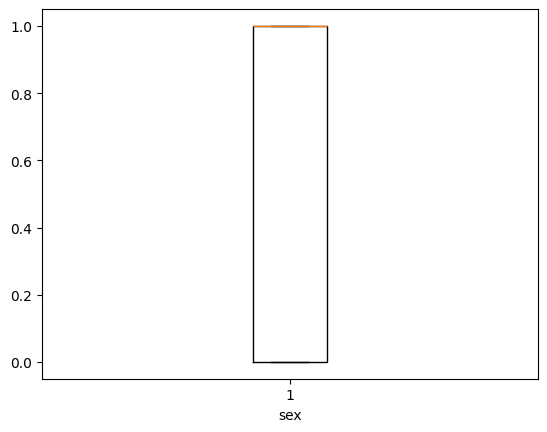

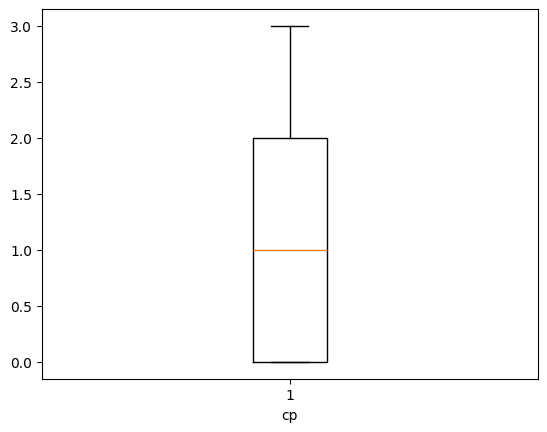

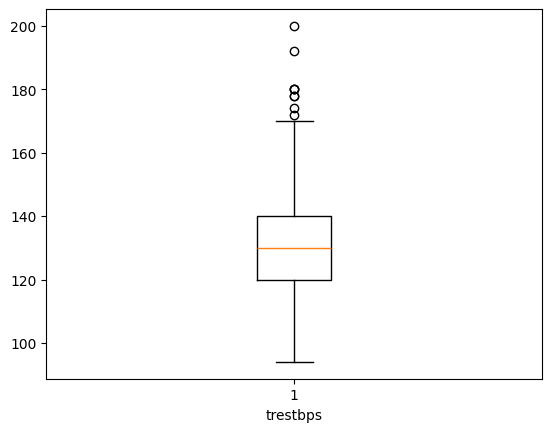

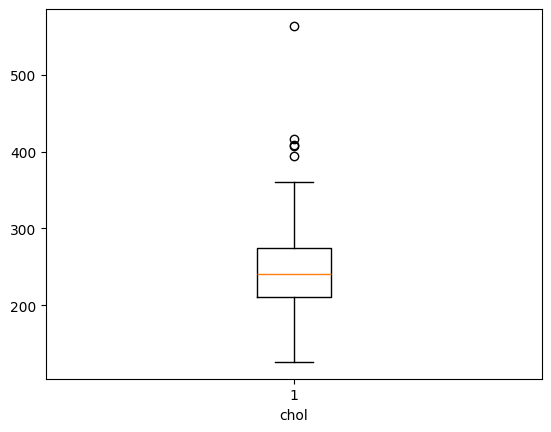

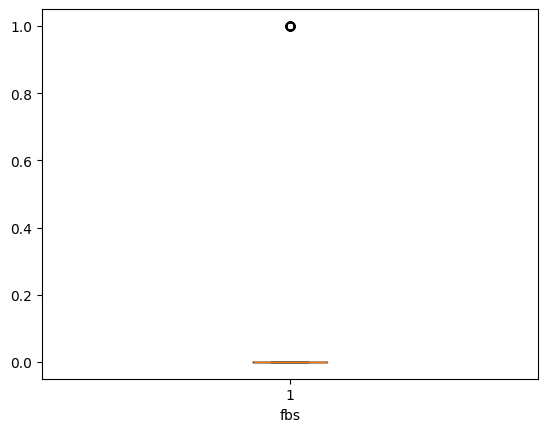

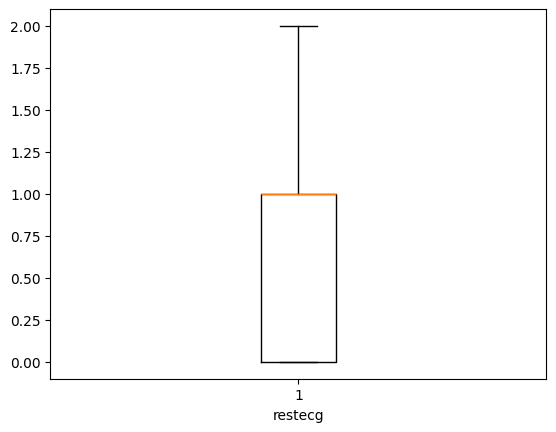

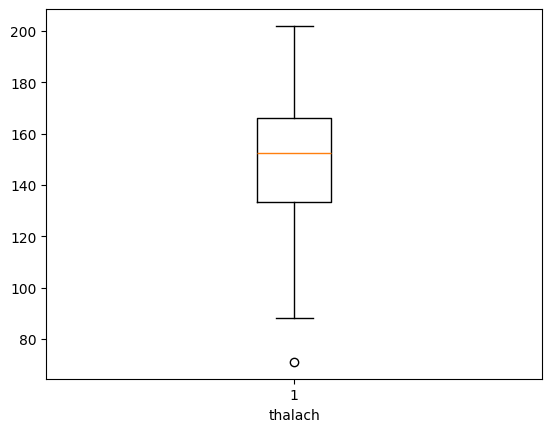

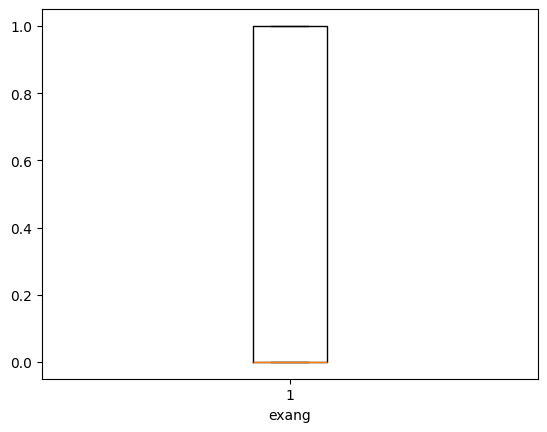

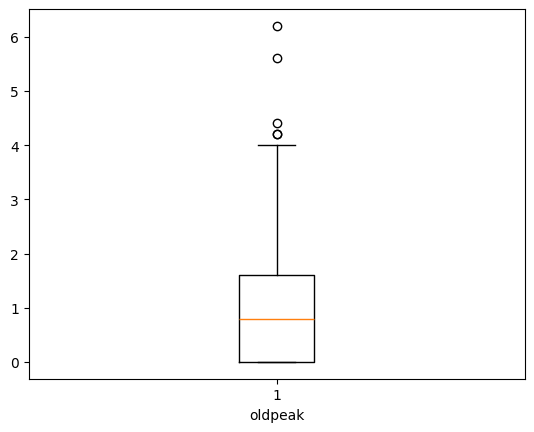

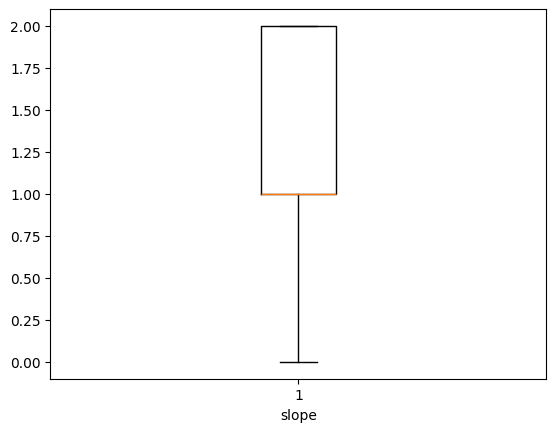

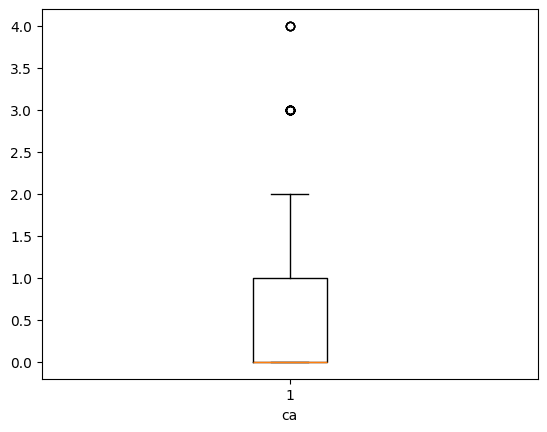

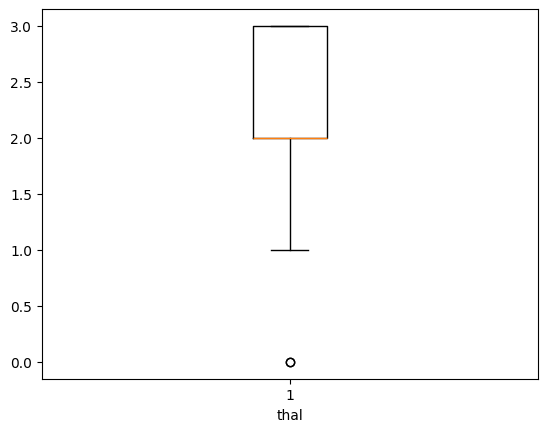

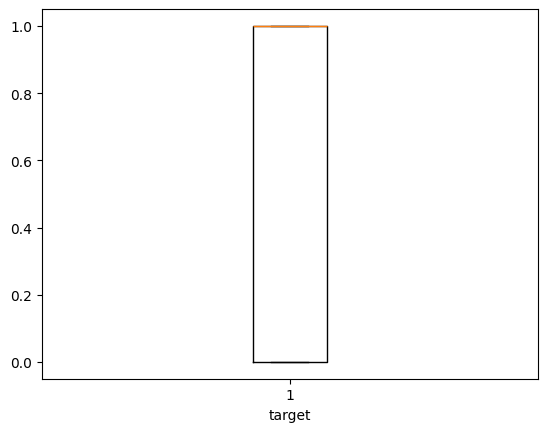

In [152]:
# Plot boxplot for numeric columns in 'col'
for i in col:
    if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

**As tree algorithms don't have much impact of outliers then we can skip the outlier removal part**

## **Step 5: Correlation Analysis**

Correlation heatmap shows that features are not highly correlated (no multicollinearity).

In [153]:
#Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


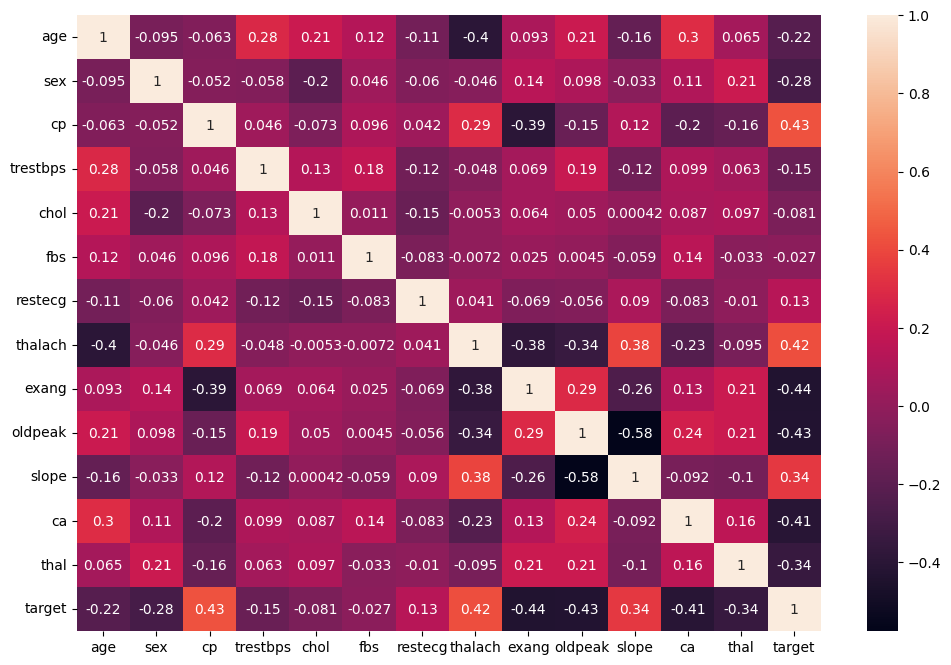

In [154]:
# Plot heatmap of correlation matrix with values shown
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

No high correlation (above 0.7) between features; hence all features retained.

## **Step 6: Model Building**

### Splitting Dataset

In [155]:
x = df.drop(columns=['target'])  # Features (drop target column)
y = df['target']                 # Target variable

In [156]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [157]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [158]:
# Split data into train/test sets (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)

In [159]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2


In [160]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2


In [161]:
y_train

,target
255,0
222,0
35,1
273,0
230,0
...,...
72,1
99,1
70,1
65,1


In [162]:
y_test

,target
150,1
90,1
101,1
15,1
33,1
...,...
138,1
262,0
149,1
23,1


### Model Training

In [163]:
 # Create Decision Tree model
model = DecisionTreeClassifier()

 # Train model on training data
model.fit(x_train, y_train)


DecisionTreeClassifier()

### Prediction & Accuracy

In [164]:
 # Predict target values for test data
y_pred = model.predict(x_test)

In [165]:
#predicated value
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [166]:
# Calculate accuracy of the model
accuracy_score(y_test, y_pred)

0.8360655737704918

**The initial model achieved an accuracy of around 84% before tuning**

### Confusion Matrix

Confusion matrix used for evaluation.

In [167]:
# Compute confusion matrix to evaluate prediction results
print(confusion_matrix(y_test, y_pred))

[[20  4]
 [ 6 31]]


## Decision Tree Visualization

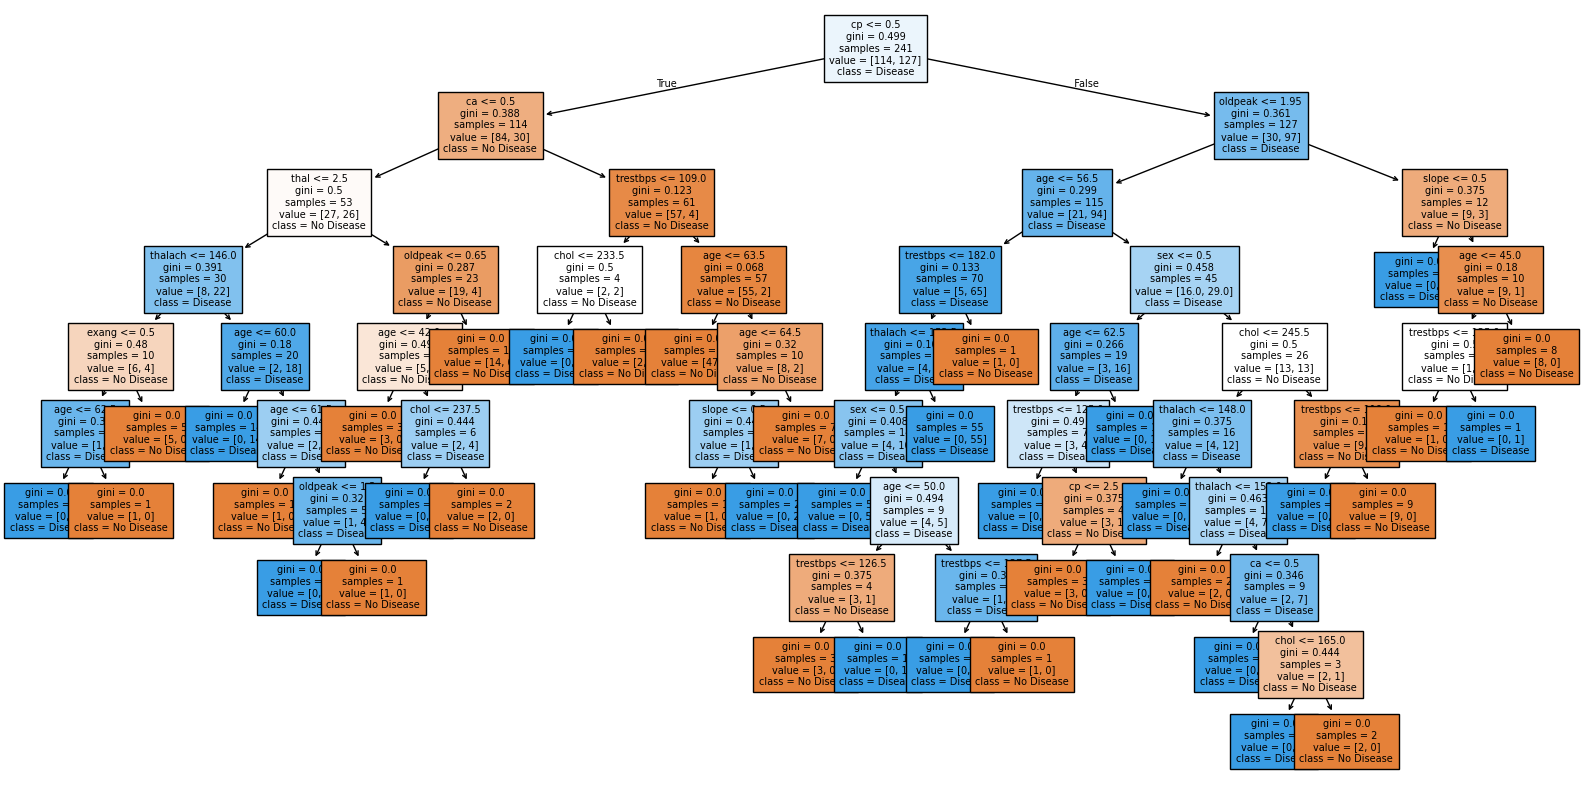

In [168]:
# Visualize the decision tree with smaller font size
plt.figure(figsize=(20,10))
tree.plot_tree(model,filled=True,feature_names=x.columns, class_names=['No Disease', 'Disease'], fontsize=7)
plt.show()

### Insights :
* Root node  i.e  Chest pain type (cp) is the most important feature.
* **Deep tree → possible overfitting**

## **Step 7: Model Optimization - Varying Tree Depth**

 Reduce overfitting and improve generalization.

In [169]:
# Testing different max depth to increase accuracy
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in depth:
    model = DecisionTreeClassifier(max_depth=i, random_state=60)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Max depth:", i, "Accuracy:", acc)

Max depth: 1 Accuracy: 0.7868852459016393
Max depth: 2 Accuracy: 0.7540983606557377
Max depth: 3 Accuracy: 0.8852459016393442
Max depth: 4 Accuracy: 0.8032786885245902
Max depth: 5 Accuracy: 0.8688524590163934
Max depth: 6 Accuracy: 0.8524590163934426
Max depth: 7 Accuracy: 0.8688524590163934
Max depth: 8 Accuracy: 0.8852459016393442
Max depth: 9 Accuracy: 0.8852459016393442
Max depth: 10 Accuracy: 0.8852459016393442
Max depth: 11 Accuracy: 0.8852459016393442
Max depth: 12 Accuracy: 0.8852459016393442
Max depth: 13 Accuracy: 0.8852459016393442


In [170]:
# To get the optimal max depth for the model
model.get_depth()

9

## **Step 8: Hyperparameter Tuning with GridSearchCV**

**GridSearchCV:**
* It is a tool in scikit-learn used to find the best hyperparameters for a machine learning model.
* Systematically searching through combinations of model parameters (like max_depth, min_samples_split) using cross-validation.
* Reduces Overfitting

## Setting Parameter Grid

In [171]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 5, 50, 100],
    'random_state': [0, 1, 2, 3, 4, 5],
    'min_samples_split': [2, 6, 8, 9, 3, 5, 22],
    'min_samples_leaf': [1, 4, 6, 7, 9]
}

# criterion : decide how to split the tree
# max_depth : how deep the tree can go
# min_samples_split : Minimum data points needed to split the node
# min_samples_leaf : Minimum data point required in a leaf

## Grid Search Execution

In [172]:
new_model = DecisionTreeClassifier()

In [173]:
gv = GridSearchCV(estimator = new_model, param_grid =param_grid, cv = 3)

# cv mean cross validation , it means your data will be splitted into 3 equal parts and model will be trained and evaluated 3 times

In [174]:
# training the model
gv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 50, 100],
                         'min_samples_leaf': [1, 4, 6, 7, 9],
                         'min_samples_split': [2, 6, 8, 9, 3, 5, 22],
                         'random_state': [0, 1, 2, 3, 4, 5]})

## Best Parameters

In [175]:
# return best parameters for your model that can give best accuracy
gv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 1}

## Final Model with Best Params

In [176]:
# create a model with these best parameters so that our model can give best accuracy
final_model = gv.best_estimator_

In [177]:
 # best cv score
gv.best_score_

np.float64(0.7508744855967078)

In [178]:
y_pred_final = final_model.predict(x_test)

In [179]:
 # check the accuracy score of the model in which we applied hyperparameter tuning
accuracy_score(y_test, y_pred_final)

0.9016393442622951

**Approx 90% accuracy after Hyper parameter tuning**

# **Business Conclusion:**

* A Decision Tree model was created to predict heart disease using patient data, achieving around **90% accuracy** after tuning.

* The model is **easy to understand and explain**, making it helpful for doctors in real-life decision-making.

* **Chest pain type (cp)** was the most important feature, followed by maximum heart rate (thalach) and exercise-induced angina (exang).

* All features were useful, and there were n**o strong correlations**, so no information was repeated.

* This model can help **quickly identify high-risk patients**, leading to faster diagnosis and treatment.

* It can be added to **hospital systems or health apps**, helping improve care quality and reduce costs through early detection.